# **IMPORTS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install jsonlines

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import json
import time
import nltk
import numpy as np
from requests import get
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
from timeit import default_timer as timer
from datetime import timedelta
import jsonlines

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
dat = []
val = []
with jsonlines.open('/content/drive/MyDrive/ED_CODE_DATSETS/DATASETS/Dataset for Detection of Cyber-Trolls.json') as reader:
  for i in range(20000):
    b = reader.read()
    dat.append(b['content'])
    val.append(b['annotation']['label'][0])

In [ ]:
s_w = stopwords.words("english")
print(s_w)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# **EXPANDED DATASET**

In [ ]:
dat = []
val = []
df = pd.read_csv('/content/drive/MyDrive/ED_CODE_DATSETS/DATASETS/gab.csv', error_bad_lines=False)
del df["id"]
dataf=pd.DataFrame(df)
dataf

for i in range(len(dataf)):
  if dataf.loc[i,"hate_speech_idx"]=="[1]" or dataf.loc[i,"hate_speech_idx"]=="[2]" :
    dat.append(dataf.loc[i,"text"])
    val.append("1")

for i in range(len(dat)) :
  dat[i]=dat[i].replace("1.","")

with jsonlines.open('/content/drive/MyDrive/ED_CODE_DATSETS/DATASETS/Dataset for Detection of Cyber-Trolls.json') as reader:
  for i in range(20000):
    b = reader.read()
    #a=porters_algo(b['content'])
    dat.append(b['content'])
    val.append(b['annotation']['label'][0])



dict0 = {"Sent":dat,"Label":val}
dataset3 = pd.DataFrame(dict0)

In [ ]:
for j in range(len(dataset3)):
  i=dataset3.loc[j,"Sent"]
  i = i.lower()
  i = word_tokenize(i)
  a = [w for w in i if not w in s_w and w.isalnum()]
  dataset3.loc[j,"Sent"]=a
  

In [ ]:
for i in range(len(dataset3)):
  j=dataset3.loc[i,"Sent"]
  a=""
  for x in j:
    a=a+" " + x
  dataset3.loc[i,"Sent"]=a



In [ ]:
def porters_algo(sentence):
  ps = PorterStemmer()
  a=""
  
  words = word_tokenize(sentence)
  for i in words:
    i=ps.stem(i)
    a=a+i+" "
  return a

In [ ]:
for i in range(len(dataset3)):
  j=dataset3.loc[i,"Sent"]
  a=porters_algo(j)
  dataset3.loc[i,"Sent"]=a



In [ ]:
reviews = dataset3['Sent']
labels = dataset3['Label']

In [ ]:
bully_train, bully_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=1000)

# **PREPROCESSING**

In [ ]:
dataset2 = []
for i in dat:
  i = i.lower()
  i = word_tokenize(i)
  a = [w for w in i if not w in s_w and w.isalnum()]
  
  dataset2.append(a)

In [ ]:
print(dat[8999],dataset2[8999], val[8999])

Hints in icing are bad or good? Skywriting sucks unless the hint is a very short word. I'd suggest a delicious tag for nerds. ['hints', 'icing', 'bad', 'good', 'skywriting', 'sucks', 'unless', 'hint', 'short', 'word', 'suggest', 'delicious', 'tag', 'nerds'] 1


In [ ]:
ps = PorterStemmer()
for i in range(0,len(dataset2)) :
  temp = str()
  for j in dataset2[i]:
    temp += ps.stem(j) +" "
  dataset2[i] = temp
  temp = " "

In [ ]:
print(dat[8999],dataset2[8999], val[8999])

Hints in icing are bad or good? Skywriting sucks unless the hint is a very short word. I'd suggest a delicious tag for nerds. hint ice bad good skywrit suck unless hint short word suggest delici tag nerd  1


In [ ]:
dict0 = {"Sent":dat,"Label":val}
dataset3 = pd.DataFrame(dict0)

In [ ]:
dataset3.head()

,Sent,Label
0,i joined gab to remind myself how retarded je...,1
1,It makes you an asshole.\n2. \tGive it to a ...,1
2,So they manage to provide a whole lot of data...,1
3,you sound like a faggot \n,1
4,"Well, you are the fuckers that lit the match ...",1


In [ ]:
reviews = dataset3['Sent']
labels = dataset3['Label']

In [ ]:
bully_train, bully_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=1000)

In [ ]:
def nlt_tokenizer(i):
  i = i.lower()
  i = word_tokenize(i)
  a = [w for w in i if not w in s_w and w.isalnum()]
  return(a)

In [ ]:
vectorizer = CountVectorizer(tokenizer = nlt_tokenizer, ngram_range=(1,1))

In [ ]:
start = timer()
vectorizer.fit(bully_train)
end = timer()
print(timedelta(seconds=end-start))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0:00:07.585369


In [ ]:
start = timer()
X_train = vectorizer.transform(bully_train)
X_test = vectorizer.transform(bully_test)
end = timer()
print(timedelta(seconds=end-start))

0:00:09.417290


# **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
start = timer()
classifier = LogisticRegression(max_iter=160)
classifier.fit(X_train, y_train)
end = timer()
print(timedelta(seconds=end-start))

0:00:01.653264


In [ ]:
accuracy = classifier.score(X_test, y_test)
print(accuracy)

0.8633290699799013


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

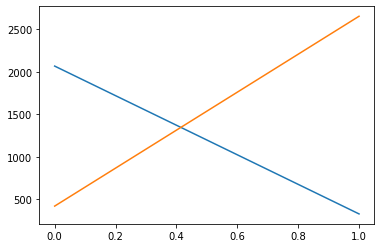

In [ ]:
predictions = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
plt.plot(cm)

In [ ]:
cm

array([[2069,  420],
       [ 328, 2656]])

# **GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
start = timer()
gnb = GaussianNB()
y_pred = gnb.fit(X_train.toarray(), y_train).predict(X_test.toarray())
end = timer()
print(timedelta(seconds=end-start))

0:00:15.671284


In [ ]:
accuracy = classifier.score(X_test, y_pred)
print(accuracy)

0.7613740179060844


In [ ]:
GNB_mod = gnb.fit(X_train.toarray(), y_train)

In [ ]:
new_reviews = ['You are such a fucking loser', 'uhhh not really anything.', 'Yo this is boring', ' you shitty ass fucker', 'what the hell are you doing you sick fuck']
X_new = vectorizer.transform(new_reviews)
classifier.predict(X_new)

array(['1', '0', '0', '1', '1'], dtype=object)

In [ ]:
GNB_mod.predict(X_new.toarray())

array(['0', '0', '0', '1', '0'], dtype='<U1')

# **RNN**

In [ ]:
from keras.preprocessing import sequence
max_words = 50000
X_train = sequence.pad_sequences(X_train.toarray(), maxlen=max_words)
X_test = sequence.pad_sequences(X_test.toarray(), maxlen=max_words)

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
embedding_size=32
vocabulary_size = 14384
embed_dim = 128
lstm_out = 196
model=Sequential()
#model.add(Embedding(vocabulary_size, embed_dim,input_length = 500))
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(100))
#model.add(Dense(2,activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50000, 32)         460288    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 513,589
Trainable params: 513,589
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='categorical_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [ ]:
batch_size = 64
num_epochs = 3
y_train = np.array([int(i) for i in y_train])
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/3


KeyboardInterrupt: ignored

In [ ]:
y_test = np.array([int(i) for i in y_test])
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

In [ ]:
model2.predict(X_test)

In [ ]:
n = open("time1.csv", 'a', encoding='utf-8')
n.writelines("Time"+","+"No. of Words"+"\n")
n.close()
op = [" "," ",{}]
def input_classifier(detec_a):
    new_reviws = [detec_a]
    str_size = len(detec_a.split())
    start = timer()
    x_tran = vectorizer.transform(new_reviws)
    end = timer()
    time_req = timedelta(seconds=end-start)
    op[0] = "Cyberbullying" if classifier.predict(x_tran)[0] == '1' else "Not Cyberbullying"
    op[2]["LR"] = time_req
    #op[1] = "Cyberbullying" if gnb.fit(X_train.toarray(), y_train).predict(x_tran.toarray())[0] == '1' else "Not Cyberbullying"
    op_strin = "LR classifier classifies the extract as :\n \t" + op[0] + "\n Time taken" + str(op[2]["LR"]).replace('0:00:', '') + "\n No. of words" + str(str_size)  #+ "\nNB classifier classifies the extract as \t" + op[1]
    n = open("time1.csv", 'a', encoding='utf-8')
    n.writelines(str(op[2]["LR"]).replace('0:00:', '') + "," + str(str_size)+ "\n")
    return(op_strin)

input_classifier("You are such a fucking loser")

# ***BERT MODEL***

In [ ]:
!pip install bert-for-tf2 >> /dev/null

In [ ]:
import os
import math
import datetime
import jsonlines
from tqdm import tqdm

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
#from keras.regularizers import l1_l2
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/BERT_FINAL/my_model')
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 128)]             0         
_________________________________________________________________
bert (BertModelLayer)        (None, 128, 768)          38011392  
_________________________________________________________________
lambda (Lambda)              (None, 768)               0         
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 768)               590592    
_________________________________________________________________
dropout_1 (Dropout)          (None, 768)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 768)               0     

In [ ]:
classes=['1', '0']
tokenizer = FullTokenizer(vocab_file="/content/drive/MyDrive/BERT/lightmodel/vocab.txt")

In [ ]:
sentences = [
  " Dude they dont finish enclosing the fucking showers. I hate half assed jobs. Whats the reasononing behind it? Makes no sense. ",
  " I AM SRY"
]

pred_tokens = map(tokenizer.tokenize, sentences)
pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))

pred_token_ids = map(lambda tids: tids +[0]*(128-len(tids)),pred_token_ids)
pred_token_ids = np.array(list(pred_token_ids))

predictions = new_model.predict(pred_token_ids).argmax(axis=-1)
hate=["HATE","NOT HATE"]

for text, label in zip(sentences, predictions):
  print("text:", text, "\nintent:", classes[label],"\nRESULT:",hate[label])
  print("")
  

text:  Dude they dont finish enclosing the fucking showers. I hate half assed jobs. Whats the reasononing behind it? Makes no sense.  
intent: 1 
RESULT: HATE

text:  I AM SRY 
intent: 0 
RESULT: NOT HATE



In [ ]:
def predict(s):
  sentences=[s]
  pred_tokens = map(tokenizer.tokenize, sentences)
  pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
  pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))

  pred_token_ids = map(lambda tids: tids +[0]*(128-len(tids)),pred_token_ids)
  pred_token_ids = np.array(list(pred_token_ids))

  predictions = new_model.predict(pred_token_ids).argmax(axis=-1)
  hate=["HATE","NOT HATE"]
  

  for  label in  predictions:
      ans=classes[label]
  return ans

# **Dataset Creation for final NN**

In [ ]:
n = open("t.csv", 'a', encoding='utf-8')
n.writelines("Sent"+","+"LR"+","+"GNB"+","+"BERT"+"\n")
n.close()

In [ ]:
def nlt_tokenizer(i):
  k = str()
  i = i.lower()
  i = word_tokenize(i)
  a = [ps.stem(w) for w in i if not w in s_w and w.isalnum()]
  empty=""
  for x in a :
    empty+= " " +x
  return(empty)

In [ ]:
def csv_maker(detec_a,act=0):
  detec_a = nlt_tokenizer(detec_a)
  new_reviws = [detec_a]
  x_tran = vectorizer.transform(new_reviws)
  LR = classifier.predict(x_tran)[0]
  GNB1 = GNB_mod.predict(x_tran.toarray())[0]
  BERT1 = predict(detec_a)
  n = open("t.csv", 'a', encoding='utf-8')
  n.writelines(str(detec_a)+","+str(LR)+","+str(GNB1)+","+str(BERT1)+","+str(act)+"\n")
  n.close()

In [ ]:
csv_maker(reviews[9],labels[9])

In [ ]:
#for i in range(27170,len(reviews)):
  try:
    csv_maker(reviews[i],labels[i])
  except:
    continue

# **Final NN**

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/ED_CODE_DATSETS/DATASETS/t-4.csv")

In [ ]:
df1.head()

,Sent,LR,GNB,BERT,ACTUAL
0,join gab remind retard jew hater would type a...,1,0,1,1
1,make asshol give soldier defend tri burn show...,1,1,1,1
2,manag provid whole lot data except critic lit...,1,1,1,1
3,sound like faggot,1,0,1,1
4,well fucker lit match fakepatriot lock racist...,1,1,1,1


In [ ]:
X_v = df1[['LR','GNB','BERT']]
Y_l = df1['ACTUAL']

In [ ]:
def nlt_tokenizer(i):
  k = str()
  i = i.lower()
  i = word_tokenize(i)
  a = [ps.stem(w) for w in i if not w in s_w and w.isalnum()]
  empty=""
  for x in a :
    empty+= " " +x
  return(empty)

In [ ]:
X_v_train, X_v_test, Y_l_train, Y_l_test = train_test_split(X_v,Y_l)

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout
final_nn = Sequential()
final_nn.add(Dense(5,input_dim = 3))
final_nn.add(Dense(24))
final_nn.add(Dropout(0.5))
final_nn.add(Dense(6))
final_nn.add(Dense(1,activation='sigmoid'))

In [ ]:
final_nn.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
final_nn.fit(X_v_train, Y_l_train, epochs=30, batch_size=100, verbose=0)

In [ ]:
final_nn.evaluate(X_v_test,Y_l_test)

214/214 [==============================] - 1s 980us/step - loss: 0.1507 - accuracy: 0.9589


[0.1506994366645813, 0.9589241147041321]

In [ ]:
final_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 24)                144       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 150       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def final_pred(detec_a):
  d = [0,0,0]
  detec_a = nlt_tokenizer(detec_a)
  new_reviws = [detec_a]
  x_tran = vectorizer.transform(new_reviws)
  d[0] = int(classifier.predict(x_tran)[0])
  d[1] = int(GNB_mod.predict(x_tran.toarray())[0])
  d[2] = int(predict(detec_a))
  return final_nn.predict(pd.DataFrame([d]))


In [ ]:
final_pred("hard to kick ass yourself with slippers on?  On it")

array([[0.9469884]], dtype=float32)

In [ ]:
final_pred("She is as dirty as they come  and that crook Rengel  the Dems are so fucking corrupt it's a joke. Make Republicans look like")

array([[0.9919704]], dtype=float32)

In [ ]:
final_pred("i was on a road trip ")

array([[0.02093729]], dtype=float32)

In [ ]:
final_pred("fuck yes.  I hate them at work...")

array([[0.9469884]], dtype=float32)

# TELEGRAM BOT INTEGRATION

Bot.py script


In [ ]:
x = """
import requests
import json
import configparser as cfg


class telegram_chatbot():

    def __init__(self, config):
        self.token = self.read_token_from_config_file(config)
        self.base = "https://api.telegram.org/bot{}/".format(self.token)

    def get_updates(self, offset=None):
        url = self.base + "getUpdates?timeout=100"
        if offset:
            url = url + "&offset={}".format(offset + 1)
        r = requests.get(url)
        return json.loads(r.content)

    def send_message(self, msg, chat_id):
        url = self.base + "sendMessage?chat_id={}&text={}".format(chat_id, msg)
        if msg is not None:
            requests.get(url)

    def send_doc(self, msg, chat_id):
        url = self.base + "sendDocument?chat_id={}&document={}".format(chat_id, open(msg,'rb'))
        if msg is not None:
            requests.get(url)

    def read_token_from_config_file(self, config):
        parser = cfg.ConfigParser()
        parser.read(config)
        return parser.get('creds', 'token')
"""

In [ ]:
with open("bot.py", 'w') as filee:
  filee.write(x)

In [ ]:
x = """[creds]
token = 1770639969:AAEOxD4-BQbtAS3sc-FAvQwsnzI7DwT0TAw"""

with open("config.cfg", 'w') as filee:
  filee.write(x)

Server.py script


In [ ]:
from bot import telegram_chatbot
import datetime

bot = telegram_chatbot("config.cfg")
str3 = " "

def make_reply(msg):
    reply = None
    str3 = " "
    d = msg.split()
    msg = msg.lower().split()
    a = str3.join(msg)
    try:
        if msg == "What can this bot do?".lower().split() or msg == "What is the bot?".lower().split() or \
                msg == "Functions of this bot?".lower().split():
            reply = "This bot is developed by Ashish Hegde, this can detect cyberbullying"
        elif msg[0] == "/start":
            reply = "Forward a message to detect if the content is classified as cyberbullying"
        else:
            reply = input_classifier(a)

    except:
        n = open("errorss.txt", 'a', encoding='utf-8')
        n.writelines(str3.join(msg) + "\t" + str(datetime.datetime.now()) + "\n")
        reply = "Sorry, Something went wrong!"
    return reply


update_id = None
while True:
    updates = bot.get_updates(offset=update_id)
    updates = updates["result"]
    if updates:
        for item in updates:
            update_id = item["update_id"]
            try:
                message = str(item["message"]["text"])
            except:
                message = None
            from_ = item["message"]["from"]["id"]
            if from_ != 565947887:
                n = open("chatid_.txt", 'a', encoding='utf-8')
                n.writelines(str(from_) + "\t" + str(datetime.datetime.now()) + "\n")
            reply = make_reply(message)
            bot.send_message(reply, from_)

In [ ]:
!sudo apt-get install lshw

In [ ]:
!sudo lshw -short